# Cross validation
So far, we have train one model with one parameter setting. Ususally we want to compare different models. We don't want to use our test set for parameter optimization, so we can do yet another split, splitting the training data into a training set and validation set, and use the latter for paramater optimization. A more sophisticated way to do this is *cross validation*, here we split our data into N parts, for example `X1, X2, X3`. Then we use `X1+X2` for training and `X3` for validating, `X1+X3` for training and `X2` for validating and `X2+X3` for training and `X1` for validating.

### Exercise
- Why do we not want to use the test set for parameter optimization?
- What are advantages or disadvantages of cross validation over a single train-validation split?

Luckily, cross validation is really easy in scikit-learn and requires little coding, especially if we already have the pipeline as we had earlier. Let's make that pipeline again

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [2]:
pipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('model', KNeighborsClassifier()) # Now we leave out the parameter that we are going to tune!
])

Let's see what parameters we could in theory tune:

In [3]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', MinMaxScaler()), ('model', KNeighborsClassifier())],
 'verbose': False,
 'scale': MinMaxScaler(),
 'model': KNeighborsClassifier(),
 'scale__clip': False,
 'scale__copy': True,
 'scale__feature_range': (0, 1),
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

There are many parameters here, but the one we are interested is the number of neighbors, denoted here as: `model__n_neighbors` (with default value 5).

We give all the parameters we want to tune, with a list of the possible values, in the `param_grid`:

In [4]:
model = GridSearchCV(estimator=pipe,
                     cv = 3,
                    param_grid = {
                        'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]
                    })

In [5]:
# Read in our training data again
weather_train = pd.read_csv('data/weather_train.csv')
features = weather_train.columns[1:]
X = weather_train[features]
y = weather_train['MONTH']

In [6]:
# Fit the model
model.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

We can inspect the results as follows:

In [12]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023683,0.009709,0.049017,0.011197,1,{'model__n_neighbors': 1},0.535156,0.607843,0.639216,0.594072,0.043584,7
1,0.015554,0.005677,0.019538,0.000799,2,{'model__n_neighbors': 2},0.527344,0.537255,0.600000,0.554866,0.032170,10
2,0.010553,0.000168,0.019041,0.001128,3,{'model__n_neighbors': 3},0.546875,0.505882,0.631373,0.561377,0.052247,9
3,0.010378,0.000198,0.018876,0.000066,4,{'model__n_neighbors': 4},0.601562,0.564706,0.666667,0.610978,0.042154,1
4,0.010378,0.000152,0.019501,0.000424,5,{'model__n_neighbors': 5},0.601562,0.556863,0.635294,0.597906,0.032124,5
5,0.010759,0.000494,0.019565,0.000445,6,{'model__n_neighbors': 6},0.582031,0.580392,0.643137,0.601854,0.029200,2
6,0.010254,0.000073,0.019030,0.000232,7,{'model__n_neighbors': 7},0.589844,0.572549,0.627451,0.596615,0.022919,6
7,0.010380,0.000223,0.019622,0.000661,8,{'model__n_neighbors': 8},0.605469,0.580392,0.619608,0.601823,0.016216,3
8,0.010456,0.000168,0.018955,0.000140,9,{'model__n_neighbors': 9},0.609375,0.545098,0.600000,0.584824,0.028350,8
9,0.010500,0.000278,0.019090,0.000052,10,{'model__n_neighbors': 10},0.640625,0.549020,0.611765,0.600470,0.038241,4


This is a lot of information, but it basically tells us for each parameter, the scores for each cross validation splits. By default, this score is the mean accuracy but we could provide a different metric here.

We see that k=4 gives the best performance, although the scores are quite far apart. We can plot the scores for each value of k:

<ErrorbarContainer object of 3 artists>

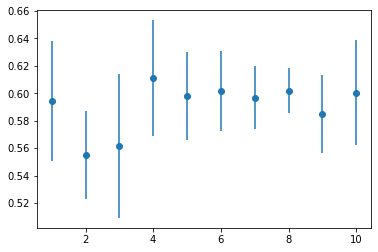

In [22]:
import matplotlib.pyplot as plt
plt.scatter(cv_results['param_model__n_neighbors'], cv_results['mean_test_score'])
plt.errorbar(cv_results['param_model__n_neighbors'], cv_results['mean_test_score'], yerr=cv_results['std_test_score'], fmt=' ')

### Exercise: different models
1. Look at the sklearn documentation and choose a different model. Create a pipeline, looping over different parameters. What do you find? Can you improve over the KNeighbors Classifier?

2. Create visualizations to understand the relationship between the parameter values and the model performance. What do you learn from the plots?

3. Apply your best model to the test set. Are you confident that the model works well on new data?

Bonus exercise 1:
Look at the documentation of [model evaluation in scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#). Are there other metrics than accuaracy that make sense to calculate for this problem? Apply this metric and explain how you interpret it.

Bonus exercise 2:
Some machine learning models, such as Random Forests or Linear Regression, allow you to inspect the *feature importance*. Look into the scikit-learn documentation for one of these models and inspect the feature importance. Which feature is the most important to the model?